# PLN

O desafio: como representar "palavras" com números

Bag-of-Words = vetor da palavra "pokemon" [0,1,0,1,0,0,0] .... O problema? milhões de posições

GRAFOS? pokemon = digimon ------ TREINADO

KERAS = Dataset 10000 palavras

In [ ]:
from cProfile import label

import tensorflow as tf
from pycparser.ply.yacc import token
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

print(f"tensorflow version: {tf.__version__}")

In [3]:
VOCAB_SIZE = 10000

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)

print(f"Temos {len(x_train)} treinamento/caracteristicas e {len(x_test)} testes/alvos")

print("\nExemplo de treinamento: \n")
print(x_train[0])
print("\nExemplo de alvo(Critica positiva): \n")
print(y_train[0])

Temos 25000 treinamento/caracteristicas e 25000 testes/alvos

Exemplo de treinamento: 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32,

In [8]:
word_index = keras.datasets.imdb.get_word_index()

word_index = {k:(v+3) for k, v in word_index.items()}
word_index["[PAD]"] = 0
word_index["[START]"] = 1
word_index["[UNK]"] = 2
word_index["[UNUSED]"] = 3

reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(text_indices):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_indices])

print(" --- Critica decodificada ----")
print(decode_review(x_train[56]))

 --- Critica decodificada ----
[START] wow i can't believe i'm the first and only one to post a comment on this great movie br br although the movie itself seemed interesting enough the real thing that attracted me to this one is matt [UNK] granted most people probably either think he's too [UNK] happy or just plain sucks but we're both the same age and from the same generation and i've watched this guy so many times that he's one of my favorites now this is one of the few movies where he is the big shot and main star kind of like in [UNK] punk another great [UNK] film br br [UNK] this is [UNK] your usual heist movies but with more twists than anything which start to amount to [UNK] also very notable in this movie is another great actor named vincent [UNK] a very under appreciated person in the film industry the woman in the movie is a newcomer and she isn't too bad although you know they hired her mainly for her accent and the nude scene br br it's a game of jack vs jill vs bob as eac

In [11]:
MAX_LEN = 250

print(f"Primeira critica valor 0 no vetor: {len(x_train[0])}")
print(f"Primeira critica valor 0 no vetor: {decode_review(x_train[0])}")
print(f"Primeira critica valor 1 no vetor: {len(x_train[56])}")
print(f"Primeira critica valor 1 no vetor: {decode_review(x_train[56])}")

Primeira critica valor 0 no vetor: 218
Primeira critica valor 0 no vetor: [START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all grown up are such a big profile for t

In [13]:
x_train_pad = pad_sequences(x_train, maxlen=MAX_LEN, padding='post')
x_test_pad = pad_sequences(x_test, maxlen=MAX_LEN, padding='post')

print(f"Primeira critica valor 0 no vetor pós padding: {len(x_train_pad[0])}")
print(f"Primeira critica valor 0 no vetor pós padding: {decode_review(x_train_pad[0])}")
print(f"Primeira critica valor 1 no vetor pós padding: {len(x_train_pad[56])}")
print(f"Primeira critica valor 1 no vetor pós padding: {decode_review(x_train_pad[56])}")

Primeira critica valor 0 no vetor pós padding: 250
Primeira critica valor 0 no vetor pós padding: [START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all grown up are 

In [14]:
EMB_DIM = 46

model = keras.Sequential([
    layers.Embedding(VOCAB_SIZE, EMB_DIM, input_length=MAX_LEN),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/Users/leonardoraiz/Documents/Leonardo/FATEC/Aulas/IA/Outros/Aula 04 - Sistemas Especialistas /.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-11-03 20:22:30.793311: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-11-03 20:22:30.793598: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-11-03 20:22:30.793624: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-11-03 20:22:30.794029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-03 20:22:30.794502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> phys

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=128, validation_data=(x_test_pad, y_test), verbose=1)

Epoch 1/5


2025-11-03 20:25:46.024165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.5919 - loss: 0.6430 - val_accuracy: 0.8496 - val_loss: 0.3803
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8750 - loss: 0.3192 - val_accuracy: 0.8685 - val_loss: 0.3541
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.9228 - loss: 0.2239 - val_accuracy: 0.8599 - val_loss: 0.3401
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.9362 - loss: 0.1810 - val_accuracy: 0.8680 - val_loss: 0.3601
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.9543 - loss: 0.1315 - val_accuracy: 0.8615 - val_loss: 0.3701


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8634 - loss: 0.3678
Acuracia no teste 0.8614799976348877


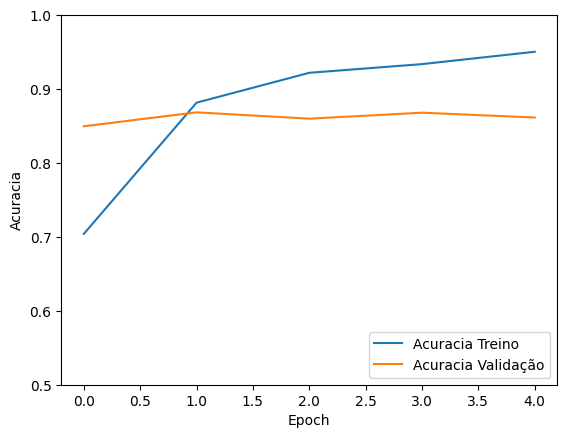

In [17]:
test_loss, test_acc = model.evaluate(x_test_pad, y_test)
print(f"Acuracia no teste {test_acc}")

plt.plot(history.history['accuracy'], label='Acuracia Treino')
plt.plot(history.history['val_accuracy'], label='Acuracia Validação')
plt.xlabel('Epoch')
plt.ylabel('Acuracia')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import re

def predict_sentiment(text):
    print(f"Avaliando: '{text}'")

    tokens = re.findall(r"\b\w+\b", text.lower())
    indexed_tokens = [word_index.get(word, 2) for word in tokens]
    indexed_tokens = [1] + indexed_tokens
    padded_text = pad_sequences([indexed_tokens], maxlen=MAX_LEN, padding='post')
    prediction  = model.predict(padded_text)[0][0]

    if prediction >= 0.5:
        print(f"Resultado: POSITIVA ({prediction*100:.1f}%)")
    else:
        print(f"Resultado: NEGATIVA ({prediction*100:.1f}%)")

predict_sentiment("This movie was absolutely amazing!")
predict_sentiment("A complete waste of time!")
predict_sentiment("It was not bad.")
predict_sentiment("It sucks")
predict_sentiment("The movie was okay!")